Deakin University

Unit: SIT720 Machine Learning

Assessment 2: Group problem solving task

*Group Members*
#Student Name: Marlon Brando Camilo - Student ID: 217629846
#Student Name: Angelito Villar  - Student ID: 218471268
#Student Name: Thuc Nguyen - Student ID: 218536504

In [6]:
    
# Task 1.1 Read the training and testing data. Print the number of features in the dataset.

import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.metrics import *
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

trainingDataFrame = pd.read_csv('train_wbcd.csv')
testingDataFrame = pd.read_csv('test_wbcd.csv')

print(trainingDataFrame.shape)
print(testingDataFrame.shape)

trainingData = trainingDataFrame.drop(columns=['Patient_ID'])
testingData = testingDataFrame.drop(columns=['Patient_ID'])

print(trainingData.shape)
print(testingData.shape)

(100, 32)
(20, 32)
(100, 31)
(20, 31)


In [15]:
#For the data label, print the total number of 1's and 0's in the training and testing data. 
#Comment on the class distribution. Is it balanced or unbalanced?

trainingData.loc[trainingData['Diagnosis']=='B','Diagnosis']=0
trainingData.loc[trainingData['Diagnosis']=='M','Diagnosis']=1

testingData.loc[testingData['Diagnosis']=='B','Diagnosis']=0
testingData.loc[testingData['Diagnosis']=='M','Diagnosis']=1

#Printing the total number of 0's and 1's in both the training and testing data
print(trainingData['Diagnosis'].value_counts())
print(testingData['Diagnosis'].value_counts())

B = 0
M = 1
print(trainingDataFrame)



0    58
1    42
Name: Diagnosis, dtype: int64
0    14
1     6
Name: Diagnosis, dtype: int64
    Patient_ID Diagnosis      f1     f2      f3      f4       f5       f6  \
0       909410         B  14.020  15.66   89.59   606.5  0.07966  0.05581   
1     84358402         M  20.290  14.34  135.10  1297.0  0.10030  0.13280   
2      8912284         B  12.890  15.70   84.08   516.6  0.07818  0.09580   
3     90317302         B  10.260  12.22   65.75   321.6  0.09996  0.07542   
4       914102         B  13.160  20.54   84.06   538.7  0.07335  0.05275   
5       924342         B   9.333  21.94   59.01   264.0  0.09240  0.05605   
6      8911164         B  11.890  17.36   76.20   435.6  0.12250  0.07210   
7       893548         B  13.050  13.84   82.71   530.6  0.08352  0.03735   
8       867739         M  18.450  21.91  120.20  1075.0  0.09430  0.09709   
9       857374         B  11.940  18.24   75.71   437.6  0.08261  0.04751   
10      853201         M  17.570  15.05  115.00   955.1  0.09

The comparison of the sum of 1's and 0's we got on the result are almost close to each other that illustrates as balance. 

In [17]:
#Priniting the features of the testing data with missing entries
trainingData.isnull().sum()


Diagnosis    0
f1           0
f2           0
f3           0
f4           0
f5           0
f6           0
f7           0
f8           0
f9           0
f10          0
f11          0
f12          0
f13          0
f14          0
f15          0
f16          0
f17          0
f18          0
f19          0
f20          0
f21          0
f22          0
f23          0
f24          0
f25          0
f26          0
f27          0
f28          0
f29          0
f30          0
dtype: int64

In [18]:
#Printing the features of the training data with missing entries
testingData.isnull().sum()

Diagnosis    0
f1           0
f2           0
f3           0
f4           0
f5           0
f6           0
f7           0
f8           0
f9           0
f10          0
f11          0
f12          0
f13          0
f14          0
f15          0
f16          0
f17          0
f18          0
f19          0
f20          0
f21          0
f22          0
f23          0
f24          0
f25          0
f26          0
f27          0
f28          0
f29          0
f30          0
dtype: int64

In [19]:
#Fill the missing entries. 
#For filling any feature, you can use either mean or median value of the feature values from observed entries.

trainingf21mean = trainingData['f21'].mean()
testingf21mean = testingData['f21'].mean()
print(trainingf21mean)
print(testingf21mean)

16.486765306122454
15.574578947368423


In [20]:
#The null entry on the dataset was filled using mean value. 
trainingData=trainingData.fillna(trainingf21mean)
testingData=testingData.fillna(testingf21mean)

In [21]:
#Normalize the training and testing data.
trainingData_norm = preprocessing.normalize(trainingData)
testingData_norm = preprocessing.normalize(testingData)

In [25]:
# Task 1.2 Logistic Regression Train logistic regression models with L1 regularization and L2 regularization using alpha = 0.1 and lambda = 0.1. 

trainingPredictors = trainingData_norm
testingPredictors = testingData_norm
trainingResponse = trainingData['Diagnosis']
testingResponse = testingData['Diagnosis']                

In [26]:
#L1 and L2 regularization using lambda value 0.1
#Report accuracy, precision, recall, f1-score and print the confusion matrix.

lambda_val = 0.1
#Initialize the Logitic regression model with l2 penalty
lr = LogisticRegression(C=1/lambda_val, penalty='l2')
lr.fit(trainingPredictors, trainingResponse)
y_predict = lr.predict(testingPredictors)
 
#Evaluate our model
model_acc = accuracy_score(testingResponse, y_predict)
model_precision = precision_score(testingResponse, y_predict)
model_recall = recall_score(testingResponse, y_predict)
model_f1 = f1_score(testingResponse, y_predict)
print("Model Accuracy is: {}".format(model_acc))
print("Model Precision score is: {}".format(model_precision))
print("Model Recall score is: {}".format(model_recall))
print("Model F1 score is: {}".format(model_f1))
print("Confusion Maxtrix:")
print(confusion_matrix(testingResponse, y_predict))

Model Accuracy is: 0.9
Model Precision score is: 1.0
Model Recall score is: 0.6666666666666666
Model F1 score is: 0.8
Confusion Maxtrix:
[[14  0]
 [ 2  4]]


In [27]:
#L1 and L2 regularization using Alpha value 0.1
#Report accuracy, precision, recall, f1-score and print the confusion matrix.
#The best hyperparameter will be the one that gives maximum validation accuracy.

alpha_val = 0.1
#Initialize the Logitic regression model with l2 penalty
lr = LogisticRegression(C=1/alpha_val, penalty='l1')
lr.fit(trainingPredictors, trainingResponse)
y_predict = lr.predict(testingPredictors)
 
#Evaluate our model
model_acc = accuracy_score(testingResponse, y_predict)
model_precision = precision_score(testingResponse, y_predict)
model_recall = recall_score(testingResponse, y_predict)
model_f1 = f1_score(testingResponse, y_predict)
print("Model Accuracy is: {}".format(model_acc))
print("Model Precision score is: {}".format(model_precision))
print("Model Recall score is: {}".format(model_recall))
print("Model F1 score is: {}".format(model_f1))
print("Confusion Maxtrix:")
print(confusion_matrix(testingResponse, y_predict))

Model Accuracy is: 0.95
Model Precision score is: 1.0
Model Recall score is: 0.8333333333333334
Model F1 score is: 0.9090909090909091
Confusion Maxtrix:
[[14  0]
 [ 1  5]]


In [28]:
# Task 1.3 Choosing the best hyper-parameter
#For each value of hyperparameter, perform 100 random splits of training data into training and validation data.

predictors = list(trainingData.columns[1:31].values)
response = ['Diagnosis']

def runLRmodel(trials, data, predictors, label, penalty_type, penalty_score):

    model_acc     = 0
    for i in range(0,trials):
        Dtrain, Dtest = train_test_split(data, test_size=0.3,shuffle=True)
        lr = LogisticRegression(C=1/penalty_score, penalty=penalty_type)
        lr.fit(Dtrain[predictors], Dtrain[label])
        y_predict = lr.predict(Dtest[predictors])
        model_acc += accuracy_score(Dtest[label], y_predict)

    model_acc /= trials

    return np.round(model_acc, decimals=2)

In [29]:
#For L2 model, choose the best lambda value from the following set: {0.001, 0.003, 0.01, 0.03, 0.1,0.3,1,3,10,33}.
#Find the average validation accuracy for each 100 train/validate pairs.
#The best hyperparameter will be the one that gives maximum validation accuracy.

lambda_vals = [.001,.003,.01,.03,.1,.3,1,3,10,33]
l2_acc = np.zeros(len(lambda_vals))
index = 0

#L2 regularization
for l in lambda_vals:
    l2_acc[index] = runLRmodel(100,trainingData, predictors, 'Diagnosis', 'l2', np.float(l))
    index += 1

print("Acc: {}".format(l2_acc))

# penalty at which validation accuracy is maximum
max_index_l2  = np.argmax(l2_acc)
best_lambda = lambda_vals[max_index_l2]
print("Best Lambda: {}".format(best_lambda))

Acc: [0.94 0.95 0.94 0.95 0.95 0.94 0.94 0.93 0.92 0.91]
Best Lambda: 0.003


In [30]:
#For L1 model, choose the best alpha value from the following set: {0.1,1,3,10,33,100,333,1000, 3333, 10000, 33333}.
#Find the average validation accuracy for each 100 train/validate pairs.

alpha_vals = [.1,1,3,10,33,100,333,1000,3333,10000,33333]
l1_acc = np.zeros(len(alpha_vals))
index = 0
#L1 regularization
for l in alpha_vals:
    l1_acc[index] = runLRmodel(100,trainingData, predictors, 'Diagnosis', 'l1', np.float(l))
    index += 1

print("Acc: {}".format(l1_acc))

# penalty at which validation accuracy is maximum
max_index_l1  = np.argmax(l1_acc)
best_alpha = alpha_vals[max_index_l1]
print("Best Alpha: {}".format(best_alpha))

Acc: [0.96 0.94 0.91 0.9  0.88 0.89 0.88 0.44 0.44 0.44 0.57]
Best Alpha: 0.1


In [31]:

#Use the best alpha and lambda parameter to re-train your final L1 and L2 regularized model. 
#Evaluate the prediction performance on the test data and report the following:
#• Precision
#• Accuracy
#• The top 5 features selected in decreasing order of feature weights.
#• Confusion matrix

lambda_val = best_lambda
#Initialize the Logitic regression model with l2 penalty
lr = LogisticRegression(C=1/lambda_val, penalty='l2')
lr.fit(trainingPredictors, trainingResponse)
y_predict = lr.predict(testingPredictors)
 
#Evaluate our model
model_acc = accuracy_score(testingResponse, y_predict)
model_precision = precision_score(testingResponse, y_predict)
model_recall = recall_score(testingResponse, y_predict)
model_f1 = f1_score(testingResponse, y_predict)
print("Model Accuracy is: {}".format(model_acc))
print("Model Precision score is: {}".format(model_precision))
print("Model Recall score is: {}".format(model_recall))
print("Model F1 score is: {}".format(model_f1))
print("Confusion Maxtrix:")
print(confusion_matrix(testingResponse, y_predict))

Model Accuracy is: 0.95
Model Precision score is: 1.0
Model Recall score is: 0.8333333333333334
Model F1 score is: 0.9090909090909091
Confusion Maxtrix:
[[14  0]
 [ 1  5]]


In [32]:

#Use the best alpha and lambda parameter to re-train your final L1 and L2 regularized model. 
#Evaluate the prediction performance on the test data and report the following:
#• Precision
#• Accuracy
#• The top 5 features selected in decreasing order of feature weights.
#• Confusion matrix

alpha_val = best_alpha
#Initialize the Logitic regression model with l2 penalty
lr = LogisticRegression(C=1/alpha_val, penalty='l1')
lr.fit(trainingPredictors, trainingResponse)
y_predict = lr.predict(testingPredictors)
 
#Evaluate our model
model_acc = accuracy_score(testingResponse, y_predict)
model_precision = precision_score(testingResponse, y_predict)
model_recall = recall_score(testingResponse, y_predict)
model_f1 = f1_score(testingResponse, y_predict)
print("Model Accuracy is: {}".format(model_acc))
print("Model Precision score is: {}".format(model_precision))
print("Model Recall score is: {}".format(model_recall))
print("Model F1 score is: {}".format(model_f1))
print("Confusion Maxtrix:")
print(confusion_matrix(testingResponse, y_predict))

Model Accuracy is: 0.95
Model Precision score is: 1.0
Model Recall score is: 0.8333333333333334
Model F1 score is: 0.9090909090909091
Confusion Maxtrix:
[[14  0]
 [ 1  5]]


The resulting value illustrates overfitting data due to the approximate values are almost similar that might indicate as the machine is learning from the training data. 

In [33]:
# Task B Multiclass Classification
df = pd.read_csv('reduced_mnist.csv')
print (df.shape)
#print(df['label'].value_counts())

(2520, 785)


In [34]:
# no of data point 2520
# no of features 784
print(df['label'].unique())

[1 9 4 2 8 6 3 5 0 7]


In [35]:
predictors = list(df.columns[1:785].values)
response = ['label']
Dtrain, Dtest = train_test_split(df, test_size=0.3)

alpha_val = 1
lr = LogisticRegression(C=1/alpha_val, penalty='l1')
lr.fit(Dtrain[predictors], Dtrain['label'])
y_predict = lr.predict(Dtest[predictors])

#Evaluate our model
model_acc = accuracy_score(Dtest[response], y_predict)
model_precision = precision_score(Dtest[response], y_predict,average='macro')
model_recall = recall_score(Dtest[response], y_predict,average='macro')
print("Model Accuracy is: {}".format(model_acc))
print("Model Precision score is: {}".format(model_precision))
print("Model Recall score is: {}".format(model_recall))

Model Accuracy is: 0.8373015873015873
Model Precision score is: 0.8337469708121903
Model Recall score is: 0.8331453921334498


In [36]:
def runLRmodel(trials, data, predictors, label, penalty_type, penalty_score):

    model_acc_test=0
    model_acc_train=0
    
    for i in range(0,trials):
        Dtrain, Dtest = train_test_split(data, test_size=0.3,shuffle=True)
        lr = LogisticRegression(C=1/penalty_score, penalty=penalty_type)
        lr.fit(Dtrain[predictors], Dtrain[label])
        y_predict_train = lr.predict(Dtrain[predictors])
        y_predict_test = lr.predict(Dtest[predictors])
        model_acc_train += accuracy_score(Dtrain[label],y_predict_train)
        model_acc_test += accuracy_score(Dtest[label],y_predict_test)
        
    model_acc_test /= trials
    model_acc_train /= trials

    return np.round(model_acc_test, decimals=2), np.round(model_acc_train, decimals=2)

In [37]:
alpha_vals = [.1,1,3,10,33,100,333,1000,3333,10000,33333]
l1_acc = np.zeros(len(alpha_vals))
l1_acc_train = np.zeros(len(alpha_vals))
index = 0
#L1 regularization
for l in alpha_vals:
    l1_acc[index], l1_acc_train[index]  = runLRmodel(10,Dtrain, predictors, 'label', 'l1', np.float(l))
    index += 1

print("Acc Test: {}".format(l1_acc))
print("Acc Train: {}".format(l1_acc_train))
# penalty at which validation accuracy is maximum
max_index_l1  = np.argmax(l1_acc)
max_index_l1_train  = np.argmax(l1_acc_train)
best_alpha = alpha_vals[max_index_l1]
best_alpha_train = alpha_vals[max_index_l1_train]
print("Best Alpha Test: {}".format(best_alpha))
print("Best Alpha Train: {}".format(best_alpha_train))

Acc Test: [0.84 0.83 0.83 0.83 0.83 0.84 0.87 0.85 0.8  0.7  0.54]
Acc Train: [1.   1.   1.   1.   1.   1.   0.96 0.92 0.84 0.74 0.56]
Best Alpha Test: 333
Best Alpha Train: 0.1


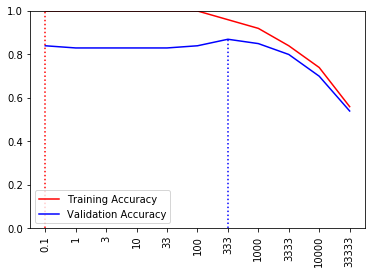

In [38]:
#plot the accuracy curve
plt.plot(range(0,len(alpha_vals)), l1_acc_train, color='r', label='Training Accuracy')
plt.plot(range(0,len(alpha_vals)), l1_acc, color='b', label='Validation Accuracy')
#replace the x-axis labels with penalty values
plt.xticks(range(0,len(alpha_vals)), alpha_vals, rotation='vertical')

#Highlight the best values of alpha and lambda
plt.plot((max_index_l1_train, max_index_l1_train), (0, l1_acc_train[max_index_l1_train]), ls='dotted', color='r')
plt.plot((max_index_l1, max_index_l1), (0, l1_acc[max_index_l1]), ls='dotted', color='b')

#Set the y-axis from 0 to 1.0
axes = plt.gca()
axes.set_ylim([0, 1.0])

plt.legend(loc="lower left")
plt.show()

The training accuracy shows overfitting from 0.1 to 100 regions as this is impossible to meet a hundred percent accuracy. 

In [39]:
alpha_val = 333
lr = LogisticRegression(C=1/alpha_val, penalty='l1')
lr.fit(Dtrain[predictors], Dtrain['label'])
y_predict = lr.predict(Dtest[predictors])

#Evaluate our model
model_acc = accuracy_score(Dtest[response], y_predict)
model_precision = precision_score(Dtest[response], y_predict,average='macro')
model_recall = recall_score(Dtest[response], y_predict,average='macro')
print("Model Accuracy is: {}".format(model_acc))
print("Model Precision score is: {}".format(model_precision))
print("Model Recall score is: {}".format(model_recall))
print("Model Coeff: {}".format(np.append(lr.intercept_, lr.coef_)))
#(lr.intercept_, lr.coef_)
print(lr.coef_.shape)
print(np.count_nonzero(np.append(lr.intercept_, lr.coef_)))
print("Confusion Maxtrix:")
print(confusion_matrix(Dtest[response], y_predict))

Model Accuracy is: 0.8690476190476191
Model Precision score is: 0.8695123602218077
Model Recall score is: 0.8665720760823099
Model Coeff: [0. 0. 0. ... 0. 0. 0.]
(10, 784)
965
Confusion Maxtrix:
[[74  1  0  0  0  0  2  0  1  0]
 [ 0 92  0  0  0  0  0  0  3  0]
 [ 2  1 56  0  0  0  0  1  3  1]
 [ 0  2  4 78  0  4  1  0  7  3]
 [ 1  0  1  0 59  0  2  0  1  5]
 [ 2  0  0  3  1 49  1  0  5  1]
 [ 2  1  2  0  1  0 72  0  1  0]
 [ 1  1  1  0  2  0  0 59  2  3]
 [ 0  5  2  0  0  4  0  0 59  0]
 [ 0  0  0  2  6  0  0  2  2 59]]


The result appears to be underfittings as it is not sufficiently fit to the original training values. 